In [1]:
#   Train a ConvNet on the MNIST fashion data.  This data consists of 10 classes of fashion images such
#   as shorts, dresses, shoes, purses, etc.  These images replace the handwritten digits in the classic MNIST dataset.
#   This change makes it harder to get a high score and more closely reflects real world usage of image 
#   classification.  And at the same time, is still small enough for the average PC to train in a short time.
# See https://github.com/zalandoresearch/fashion-mnist for information and code on Fashion MNIST

# This code is based on MNIST example found at Keras.io

In [2]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist  # new with Keras 2.1.2.  Yah!!
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [3]:
#   Supress warning and informational messages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [4]:
# Number of classes - do not change unless the data changes
num_classes = 10

In [5]:
# sizes of batch and # of epochs of data
batch_size = 128
epochs = 24

In [6]:
# input image dimensions
img_rows, img_cols = 28, 28

In [7]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() 

In [8]:
#   Deal with format issues between different backends.  Some put the # of channels in the image before the width and height of image.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = X_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [9]:
#   Type convert and scale the test and training data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
# convert class vectors to binary class matrices.  One-hot encoding
#  3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
# Define the model
model = Sequential()
# # V1
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

In [12]:
# V2
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

In [13]:
# #V3
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# #model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

In [14]:
# #V3 
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

In [15]:
#V4 - remove 1st max pool
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
#   define compile to minimize categorical loss, use ada delta optimized, and optimize to maximizing accuracy
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [17]:
#   Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
#   Return history of loss and accuracy for each epoch
hist = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/24
60000/60000 [==============================] - 123s 2ms/step - loss: 0.5724 - acc: 0.7988 - val_loss: 0.3674 - val_acc: 0.8685
Epoch 2/24
60000/60000 [==============================] - 120s 2ms/step - loss: 0.3596 - acc: 0.8712 - val_loss: 0.2997 - val_acc: 0.8906
Epoch 3/24
60000/60000 [==============================] - 120s 2ms/step - loss: 0.3093 - acc: 0.8892 - val_loss: 0.2780 - val_acc: 0.8993
Epoch 4/24
60000/60000 [==============================] - 120s 2ms/step - loss: 0.2774 - acc: 0.9010 - val_loss: 0.2572 - val_acc: 0.9048
Epoch 5/24
60000/60000 [==============================] - 120s 2ms/step - loss: 0.2557 - acc: 0.9080 - val_loss: 0.2537 - val_acc: 0.9067
Epoch 6/24
60000/60000 [==============================] - 121s 2ms/step - loss: 0.2352 - acc: 0.9149 - val_loss: 0.2488 - val_acc: 0.9102
Epoch 7/24
60000/60000 [==============================] - 125s 2ms/step - 

In [18]:
#   Evaluate the model with the test data to get the scores on "real" data.
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22570814918726684
Test accuracy: 0.9308


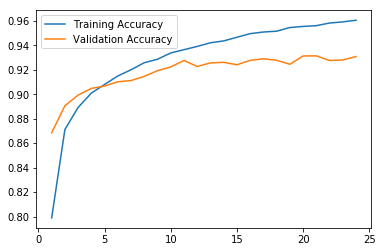

In [20]:
#   Plot data to see relationships in training and validation data
import numpy as np
import matplotlib.pyplot as plt
epoch_list = list(range(1, len(hist.history['acc']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['acc'], epoch_list, hist.history['val_acc'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()